In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime





In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
nepal=df.loc[df['location']=='Nepal']
nepal.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34877,NPL,Asia,Nepal,2020-10-09,98617.0,4364.0,2698.429,590.0,12.0,11.571,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34878,NPL,Asia,Nepal,2020-10-10,100676.0,2059.0,2603.714,600.0,10.0,11.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34879,NPL,Asia,Nepal,2020-10-11,105684.0,5008.0,3016.286,614.0,14.0,12.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34880,NPL,Asia,Nepal,2020-10-12,107755.0,2071.0,2990.286,636.0,22.0,14.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34881,NPL,Asia,Nepal,2020-10-13,111802.0,4047.0,3219.857,645.0,9.0,13.000,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [6]:
from fbprophet import Prophet
deaths=nepal.groupby('date').sum()['new_deaths'].reset_index()
new=nepal.groupby('date').sum()['new_cases'].reset_index()
new.tail()

,date,new_cases
283,2020-10-09,4364.0
284,2020-10-10,2059.0
285,2020-10-11,5008.0
286,2020-10-12,2071.0
287,2020-10-13,4047.0


In [7]:
new.columns=['ds','y']
new['ds']=pd.to_datetime(new['ds'])

deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])

In [8]:
n = Prophet(interval_width=0.95)
n.fit(new)
future_new= n.make_future_dataframe(periods=7)
# future.tail(10)
d = Prophet(interval_width=0.95)
d.fit(deaths)
future_death= d.make_future_dataframe(periods=7)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
forecast_newcases = n.predict(future_new)
forecast_deathcases = d.predict(future_death)

forecast_newcases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
290,2020-10-16,2482.902771,1901.921080,3070.784300
291,2020-10-17,2499.365021,1910.287107,3107.799727
292,2020-10-18,2489.543123,1862.095618,3054.032533
293,2020-10-19,2512.575587,1859.148480,3106.457076
294,2020-10-20,2549.302805,1952.105338,3122.148515


In [13]:
forecast_deathcases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
290,2020-10-16,12.696143,8.958844,16.240541
291,2020-10-17,12.899566,8.876386,16.689692
292,2020-10-18,13.078404,9.461232,16.764600
293,2020-10-19,13.086676,9.212240,16.729936
294,2020-10-20,13.316666,9.675938,17.224991


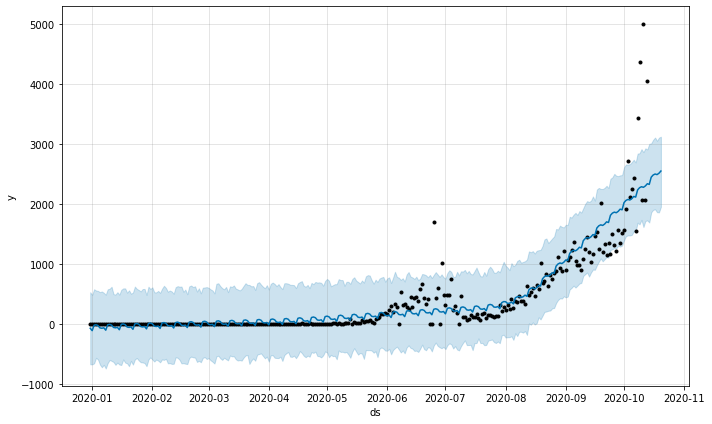

In [8]:
forecast_newcases_plot = n.plot(forecast_newcases)

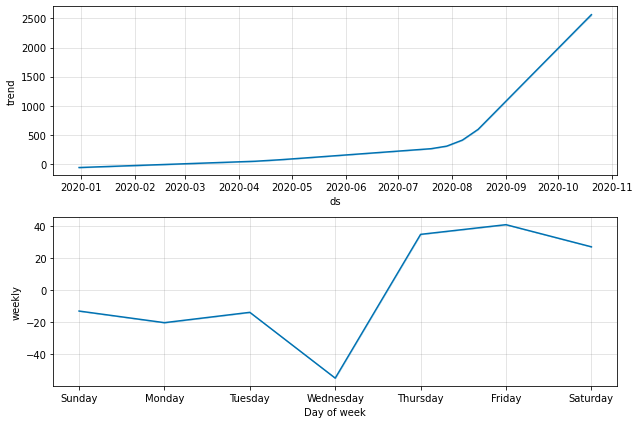

In [9]:
forecast_newcases_plot =n.plot_components(forecast_newcases)

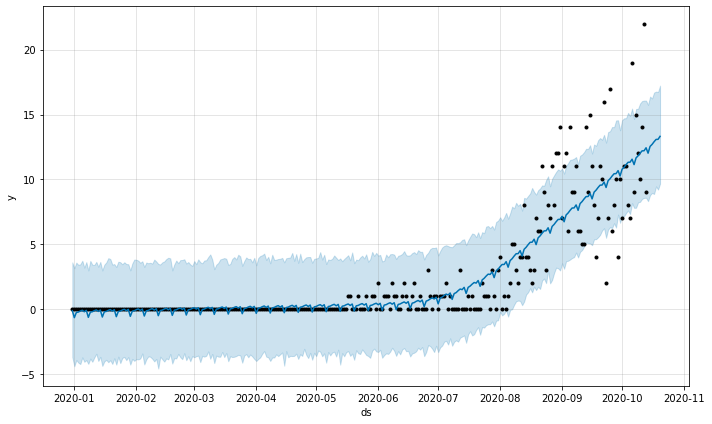

In [10]:
forecast_deathcases_plot = d.plot(forecast_deathcases)

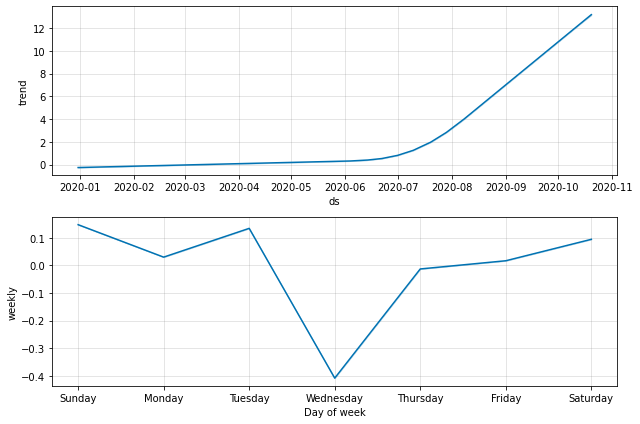

In [11]:
forecast_deathcases_plot = d.plot_components(forecast_deathcases)

In [12]:
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49878 entries, 0 to 49877
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         49590 non-null  object 
 1   continent                        49302 non-null  object 
 2   location                         49878 non-null  object 
 3   date                             49878 non-null  object 
 4   total_cases                      49242 non-null  float64
 5   new_cases                        49018 non-null  float64
 6   new_cases_smoothed               48236 non-null  float64
 7   total_deaths                     49242 non-null  float64
 8   new_deaths                       49018 non-null  float64
 9   new_deaths_smoothed              48236 non-null  float64
 10  total_cases_per_million          48954 non-null  float64
 11  new_cases_per_million            48954 non-null  float64
 12  new_cases_smoothed

In [15]:
from fbprophet import Prophet
# deaths=nepal.groupby('date').sum()['new_deaths'].reset_index()
new=df.groupby('date').sum()['new_deaths_per_million'].reset_index()
new.columns=['ds','y']
new['ds']=pd.to_datetime(new['ds'])
# new.head()

In [16]:

n = Prophet(interval_width=0.90)
n.fit(new)
future_new= n.make_future_dataframe(periods=7)
forecast_newcases = n.predict(future_new)
forecast_newcases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
290,2020-10-16,151.676250,60.848715,255.480332
291,2020-10-17,144.486813,45.552758,243.119607
292,2020-10-18,138.081699,43.827343,228.597227
293,2020-10-19,129.043415,33.938225,231.646360
294,2020-10-20,133.244496,33.950573,222.437732


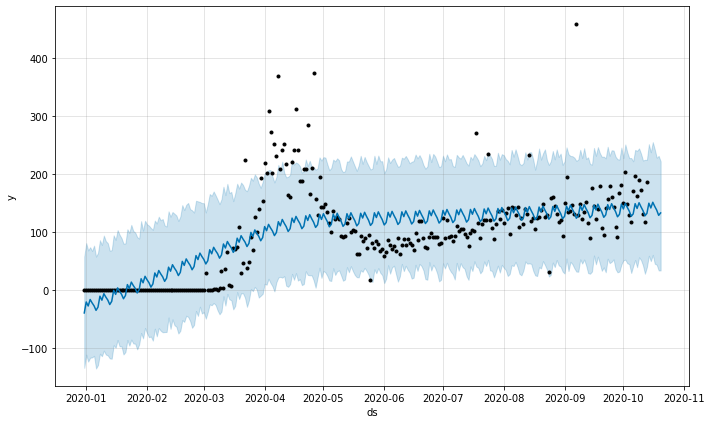

In [17]:
forecast_newcases_plot = n.plot(forecast_newcases)

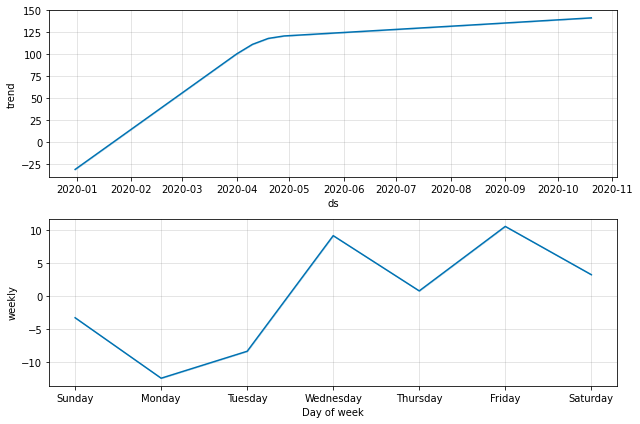

In [18]:
forecast_newcases_plot = n.plot_components(forecast_newcases)